# RNA UMAPs
Figure 1B, Extended Figure 1A-E, Extended Figure 2E

- Authors: RT, CW
- files needed: 1_RNA_all.rds
- Last updated: 04/08/24

In [1]:
library(ggplot2)
library(Seurat)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SeuratObject_5.0.1 Seurat_4.3.0.1     ggplot2_3.5.0     

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-4          
  [4] ggridges_0.5.6         IRdisplay_1.1          base64enc_0.1-3       
  [7] spatstat.data_3.0-4

In [3]:
#replace with file path 
obj.RNA <- readRDS("/path_to_file/1_RNA_all.rds")

In [3]:
colnames(obj.RNA@meta.data)

[1] "patient_sample"  "patient"         "sample_ID_long"  "uid"            
 [5] "is_multiplet"    "cell_barcode"    "total_counts"    "percent_mt"     
 [9] "percent_ribo"    "percent_heme"    "n_genes"         "compartment"    
[13] "age"             "sex"             "subtype"         "treatment_group"
[17] "state"           "response_short"  "tissue"          "day"            
[21] "pfs"             "nCount_RNA"      "nFeature_RNA"    "nCount_SCT"     
[25] "nFeature_SCT"    "S.Score"         "G2M.Score"       "Phase"          
[29] "cell_type"       "cell_subtype"    "is_mDC_high"

## Figure 1B: UMAP of cell types

In [5]:
obj.RNA$cell_type <- factor(obj.RNA$cell_type, levels = 
             c("Tumor", "CD8 T", "CD4 T", "Other T", "Cycling T",
               "NK", "B", "Monocyte/Macrophage", "cDC", "pDC", "Mast", 
               "Endothelial", "Fibroblast", "Keratinocyte" ))

# change the order of the factor levels

In [8]:
total.num.cells <- length(colnames(obj.RNA))

In [48]:
cell.type.percentages <- c()

In [49]:
for(ct in unique(obj.RNA@meta.data$cell_type)) {
    new.label <- paste0(ct, ' (', round(((dim(obj.RNA@meta.data[obj.RNA$cell_type == ct,])[1])/total.num.cells)*100, 2), '%)')
    cell.type.percentages <- append(cell.type.percentages, new.label)
}

In [50]:
cell.type.percentages

[1] "B (4.71%)"                   "Monocyte/Macrophage (6.04%)"
 [3] "Endothelial (2.62%)"         "cDC (1%)"                   
 [5] "Fibroblast (3.59%)"          "Other T (4.75%)"            
 [7] "pDC (0.31%)"                 "NK (1.47%)"                 
 [9] "CD8 T (9.79%)"               "Tumor (53.06%)"             
[11] "Cycling T (1.34%)"           "Keratinocyte (2.83%)"       
[13] "CD4 T (8.31%)"               "Mast (0.19%)"

In [ ]:
Idents(object = obj.RNA) <- "cell_type"
obj.RNA <- RenameIdents(object = obj.RNA, 'Tumor' = 'Tumor (53.06%)', 'CD8 T' = 'CD8 T (9.79%)', 
                    'Cycling T' = 'Cycling T (1.34%)', 
                    'CD4 T' = 'CD4 T (8.31%)', 'Other T' = 'Other T (4.75%)',
                    'NK' = 'NK (1.47%)', 'B' = 'B (4.71%)', 
                    'Monocyte/Macrophage' = 'Monocyte/Macrophage (6.04%)', 
                    'cDC' = 'cDC (1.00%)', 'pDC' = 'pDC (0.31%)', 
                    'Mast' = 'Mast (0.19%)', 'Endothelial' = 'Endothelial (2.62%)',
                    'Fibroblast' = 'Fibroblast (3.59%)', 
                    'Keratinocyte' = 'Keratinocyte (2.83%)')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



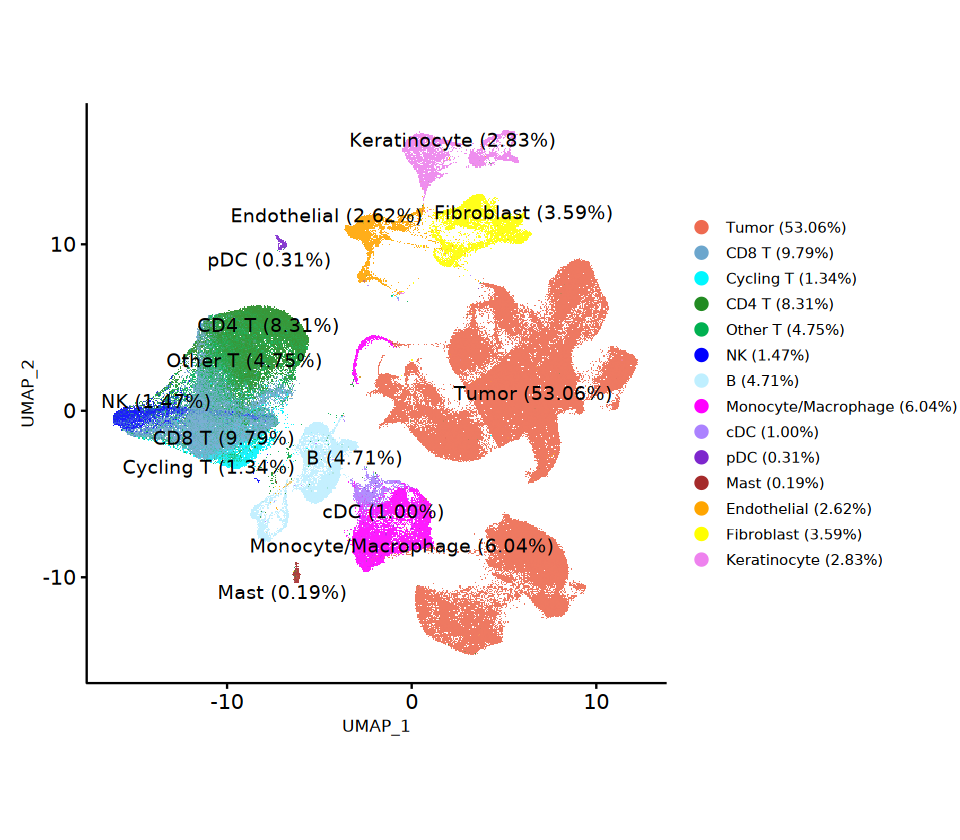

In [59]:
options(repr.plot.width = 8, repr.plot.height = 7)
plot2 <- DimPlot(obj.RNA, cols = rev(c('Endothelial (2.62%)' = 'orange',
               'Keratinocyte (2.83%)' = 'violet', 'Fibroblast (3.59%)' = 'yellow', 
               'Mast (0.19%)' = 'brown', 'pDC (0.31%)' = 'purple3',
               'cDC (1.00%)' = 'mediumpurple1', 'Cycling T (1.34%)' = '#00F7ff', 
               'NK (1.47%)' = 'blue', 'B (4.71%)' = 'lightblue1', 
               'Other T (4.75%)' = '#00B050', 'Monocyte/Macrophage (6.04%)' = 'magenta',
               'CD4 T (8.31%)' = 'forestgreen', 'CD8 T (9.79%)' = 'skyblue3', 
               'Tumor (53.06%)' = 'coral2')), pt.size = 0.9, label = TRUE, repel = TRUE) + theme(aspect.ratio = 1, text = element_text(size = 10))
plot2

## Figure 1C: Cell type dot plot

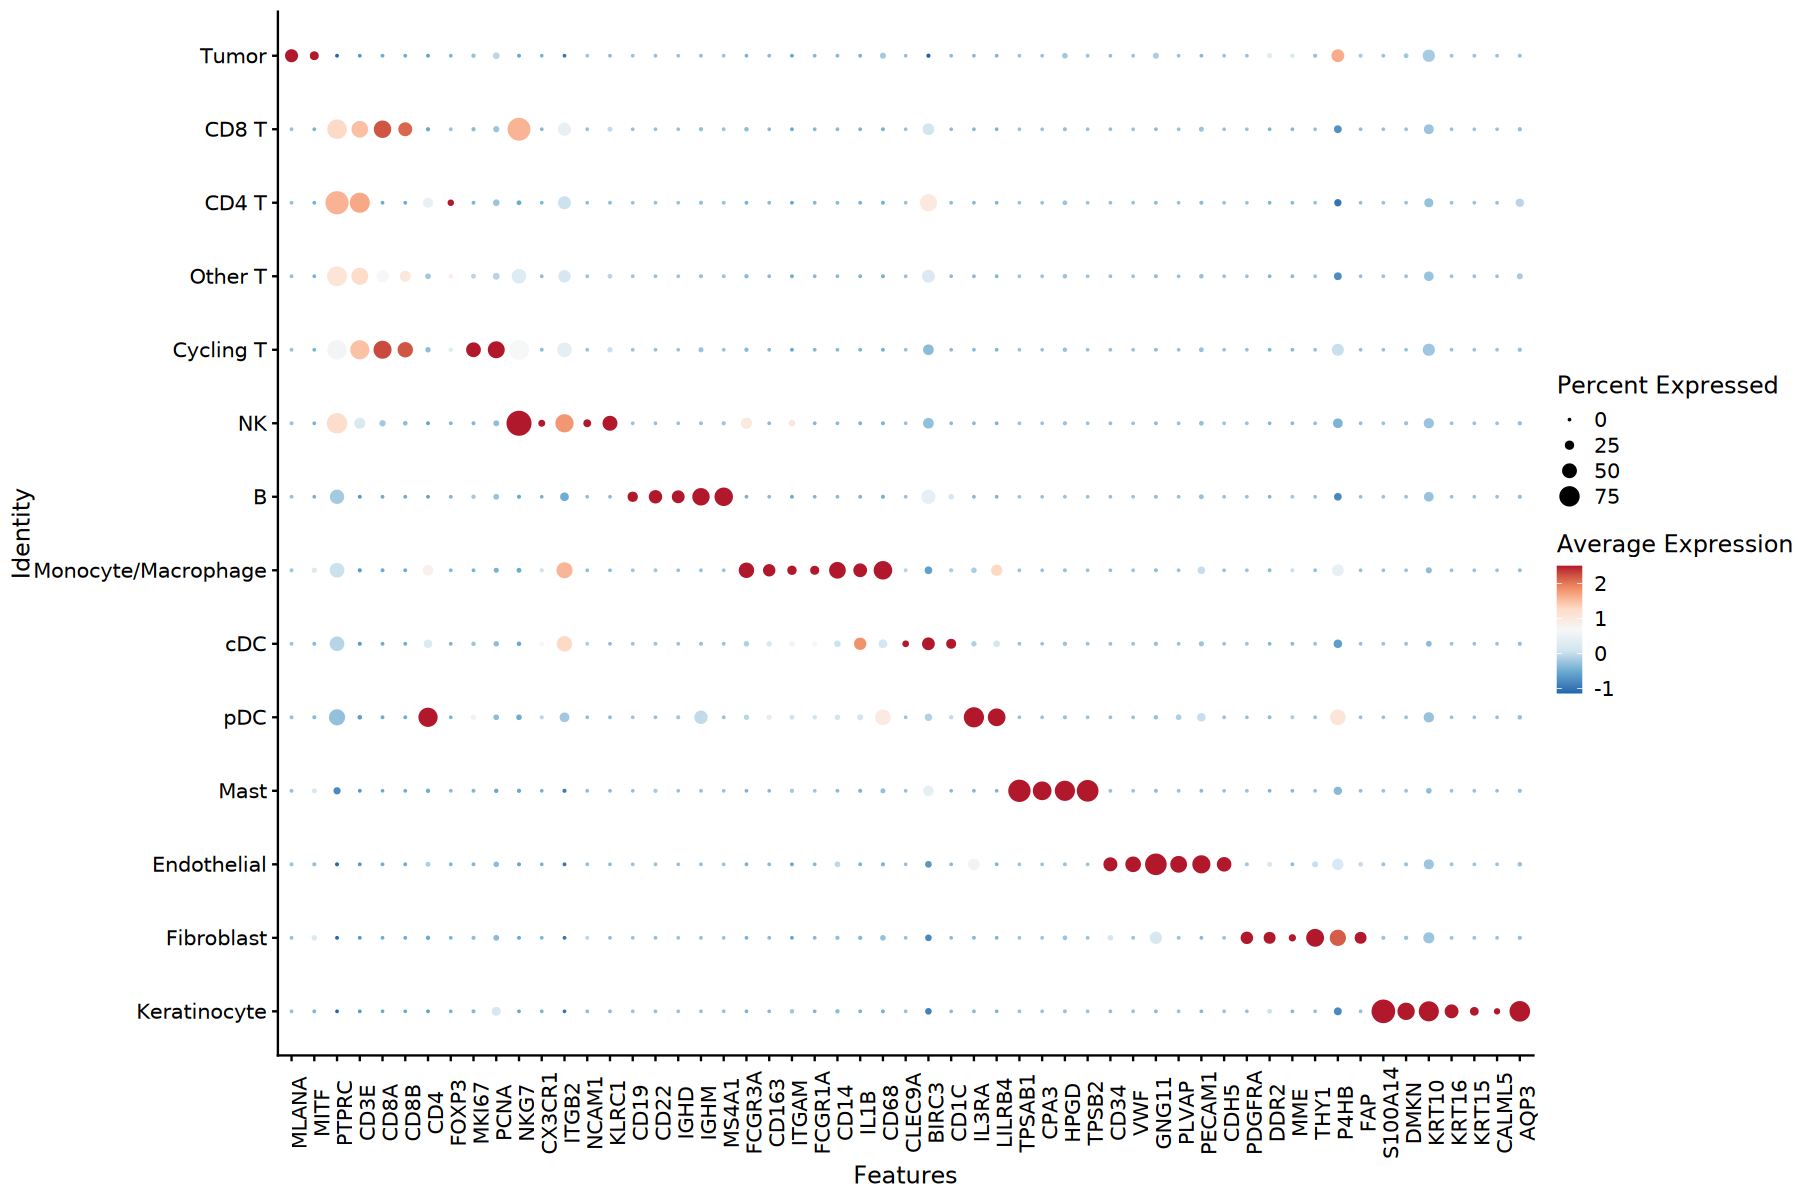

In [12]:
DefaultAssay(obj.RNA) <- 'SCT'
Idents(object = obj.RNA) <- "cell_type"
canonicalDotPlot <- DotPlot(obj.RNA, features = unique(c("MLANA", "MITF", "PTPRC", "CD3E", 
                                     "CD8A", "CD8B","CD4", "FOXP3", "MKI67", "PCNA", 
                                    "NKG7", "CX3CR1", "ITGB2", "NCAM1", "KLRC1",
                                 "CD19", "CD22", 
                                 "IGHD", "IGHM", "MS4A1", "FCGR3A",  "CD163", "ITGAM", "FCGR1A",
                                 "CD14", "IL1B", "CD68", "CLEC9A", "BIRC3", "CD1C", "IL3RA", "LILRB4",
                                  "TPSAB1", "CPA3", "HPGD", "TPSB2", "CD34", "VWF", "GNG11", 
                                "PLVAP", "PECAM1", "CDH5", "PDGFRA", "DDR2", "MME", "THY1", "P4HB", 
                                "FAP", "S100A14", "DMKN", "KRT10", "KRT16", "KRT15",
                                 "CALML5", "AQP3")), cols = 'RdBu') + theme(axis.text.x = element_text(angle = 90))
                                                                            
                                                            
canonicalDotPlot$data$id <- factor(canonicalDotPlot$data$id, levels = rev(c("Tumor", "CD8 T","CD4 T",
                                                    "Other T",  "Cycling T", "NK", "B", "Monocyte/Macrophage", "cDC", "pDC", "Mast", "Endothelial", "Fibroblast", "Keratinocyte")))
options(repr.plot.width = 15, repr.plot.height = 10)
canonicalDotPlot 

In [ ]:
sample_ID_to_patient <- readRDS("/net/bmc-lab5/data/figure_generation/sample_ID_to_patient.rds")

# Extended Figure 1A-E: UMAP by compartment, sample, subtype, treatment group, response

### 1. Compartment

In [77]:
compartment.percentages <- c()

In [78]:
for(c in unique(obj.RNA@meta.data$compartment)) {
    new.label <- paste0(c, ' (', round(((dim(obj.RNA@meta.data[obj.RNA$compartment == c,])[1])/total.num.cells)*100, 2), '%)')
    compartment.percentages <- append(compartment.percentages, new.label)
}

In [79]:
compartment.percentages

[1] "Immune (37.91%)" "Stromal (9.03%)" "Tumor (53.06%)"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



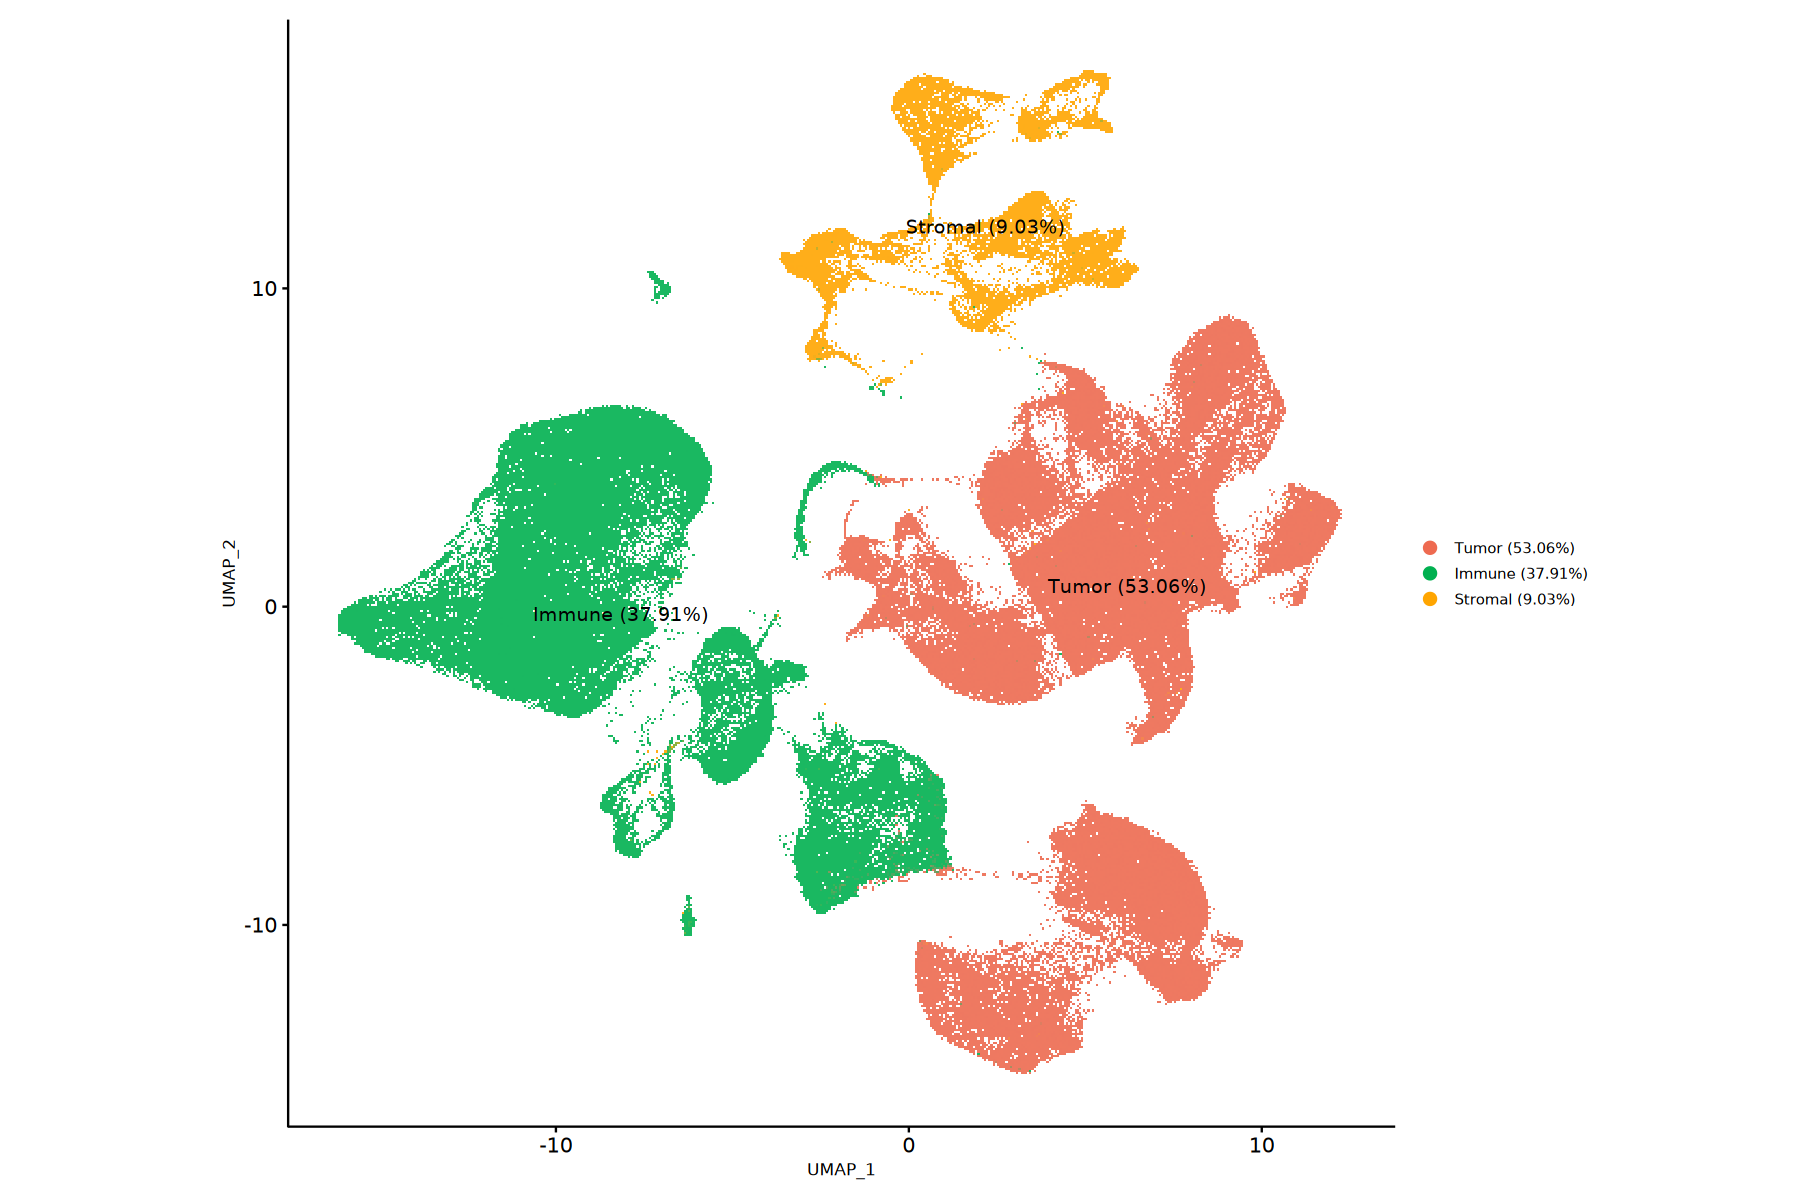

In [83]:
#EXTENDED FIGURE 1A
Idents(object = obj.RNA) <- "compartment"
obj.RNA <- RenameIdents(object = obj.RNA, 'Tumor' = 'Tumor (53.06%)', 
                    'Immune' = 'Immune (37.91%)',
                    'Stromal' = 'Stromal (9.03%)')

plot1 <- DimPlot(obj.RNA, cols = rev(c('Stromal (9.03%)' = 'orange', 
                                   'Immune (37.91%)' = '#00B050', 
                                   'Tumor (53.06%)' = 'coral2')), 
                 pt.size = 0.9, label = TRUE, repel = TRUE) + theme(aspect.ratio = 1, text = element_text(size = 10))
plot1

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



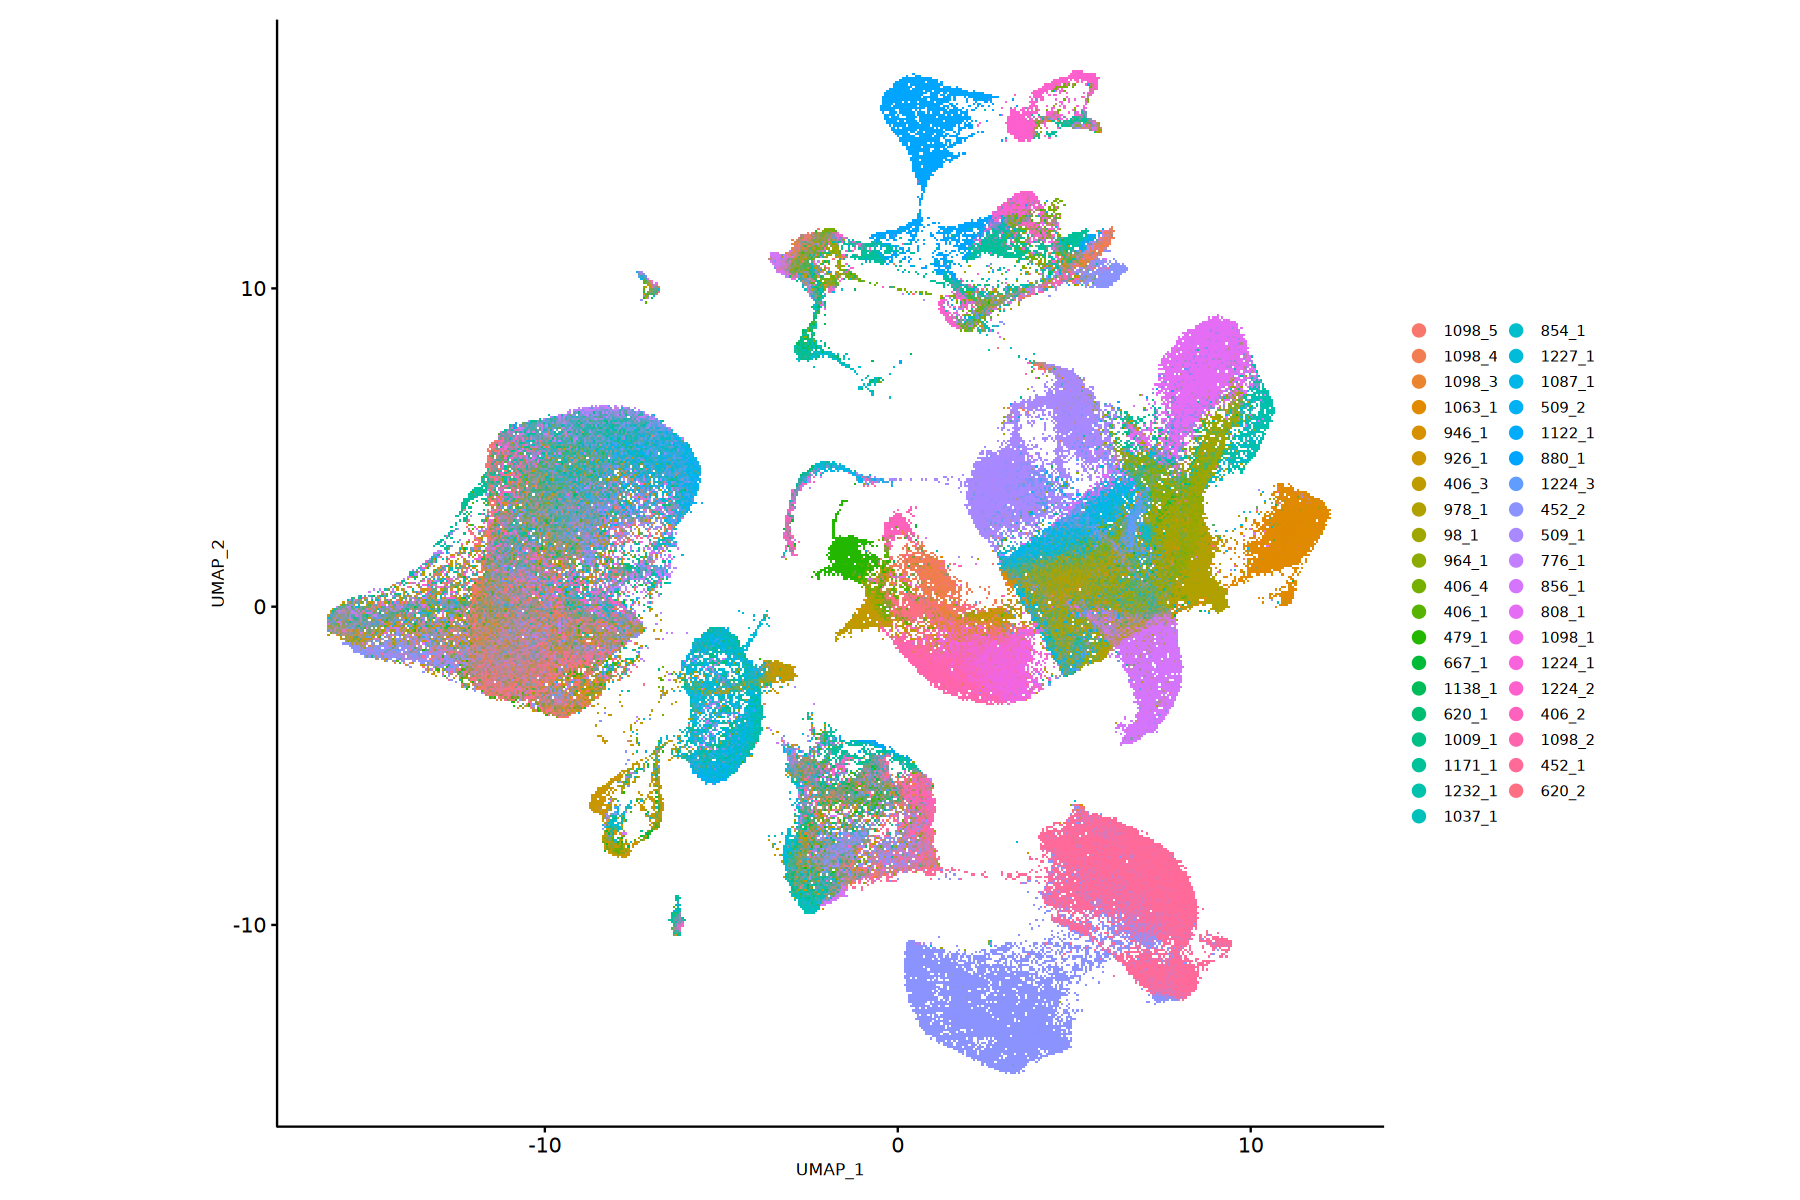

In [85]:
#EXTENDED FIGURE 1B
Idents(obj.RNA) <- obj.RNA@meta.data$patient_sample
plot2 <- DimPlot(obj.RNA, pt.size= 1, label = FALSE, repel = TRUE) + 
            theme(aspect.ratio = 1, text = element_text(size = 10))
plot2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



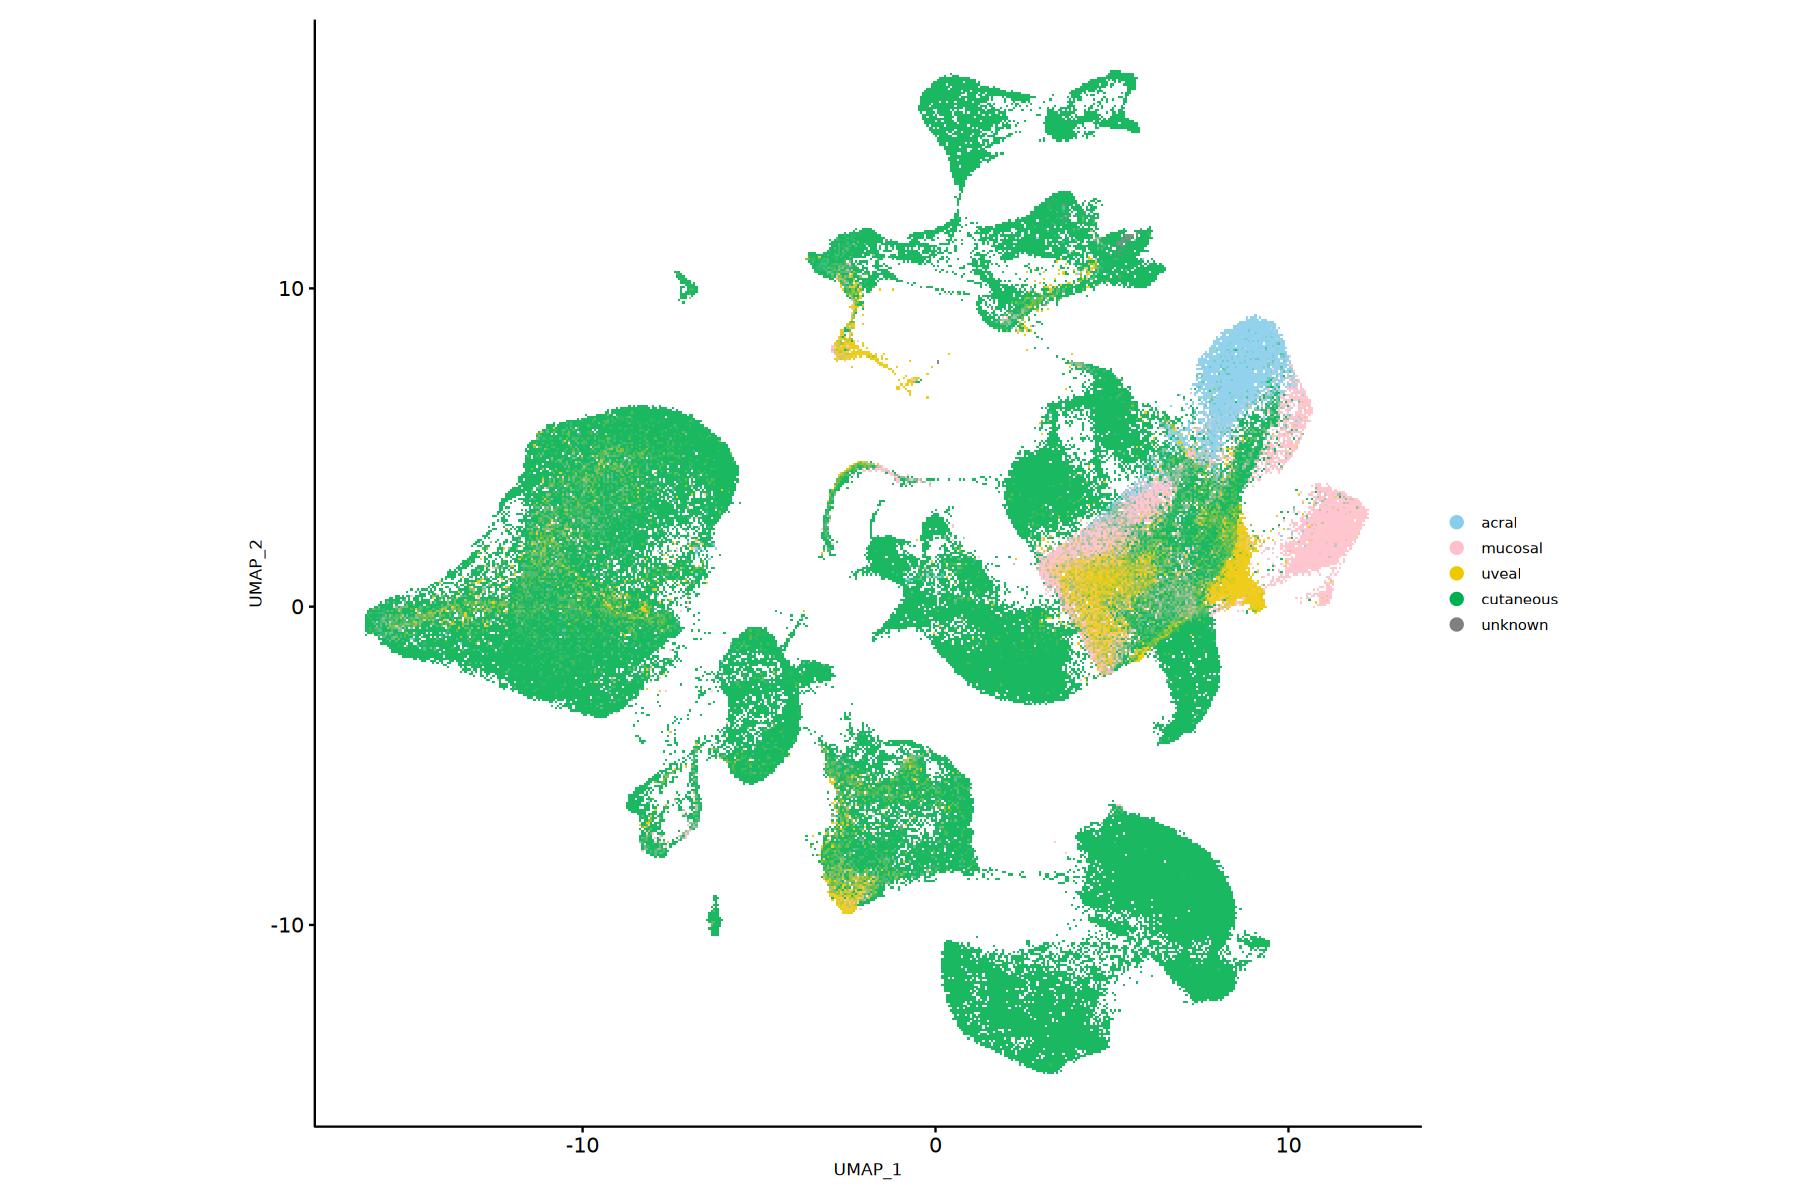

In [92]:
#EXTENDED FIGURE 1C

#change "unknown primary" subtype to "unknown" for plotting
obj.RNA@meta.data[obj.RNA@meta.data$subtype == "unknown primary",]$subtype <- "unknown"

Idents(obj.RNA) <- 'subtype'
plot3 <- DimPlot(obj.RNA, cols = c(cutaneous = '#00B050', uveal = 'gold2', mucosal = 'pink',
                                acral = 'skyblue', unknown = 'gray50'),
                  order = c('unknown', 'cutaneous', 'uveal', 'mucosal', 'acral' ), pt.size = 0.9, repel = TRUE) + 
            theme(aspect.ratio = 1, text = element_text(size = 10))
plot3

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



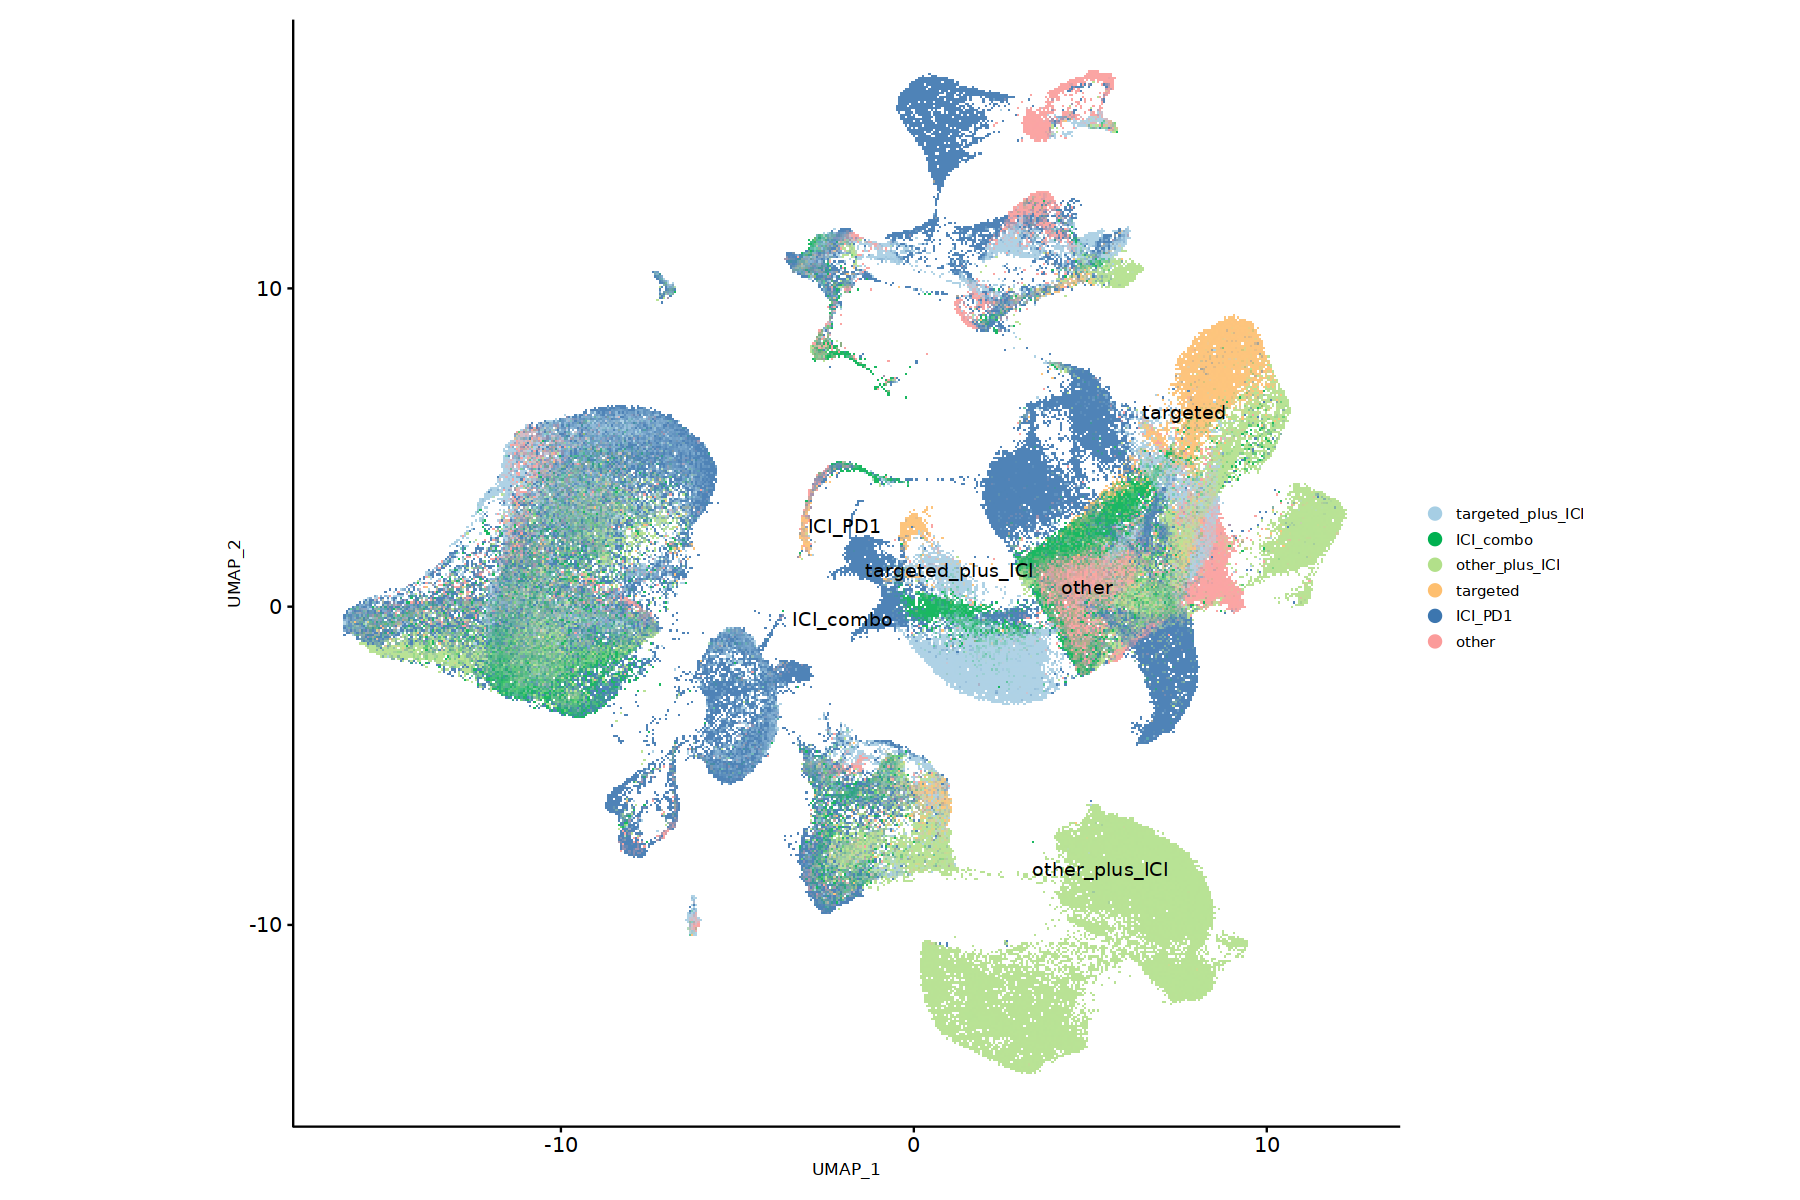

In [48]:
#EXTENDED FIGURE 1D
Idents(obj) <- 'treatment_group'
plot4 <- DimPlot(obj,  cols = c(ICI_combo = "#00B050",  ICI_PD1 = "#3C76AF", 
                                other_plus_ICI = '#B2E08A', targeted_plus_ICI = "#A6CEE4",
                                other = "#FB9B9A", targeted = "#FEBF6F"), pt.size = 0.9, label = TRUE, repel = TRUE) + 
            theme(aspect.ratio = 1, text = element_text(size = 10))

plot4

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



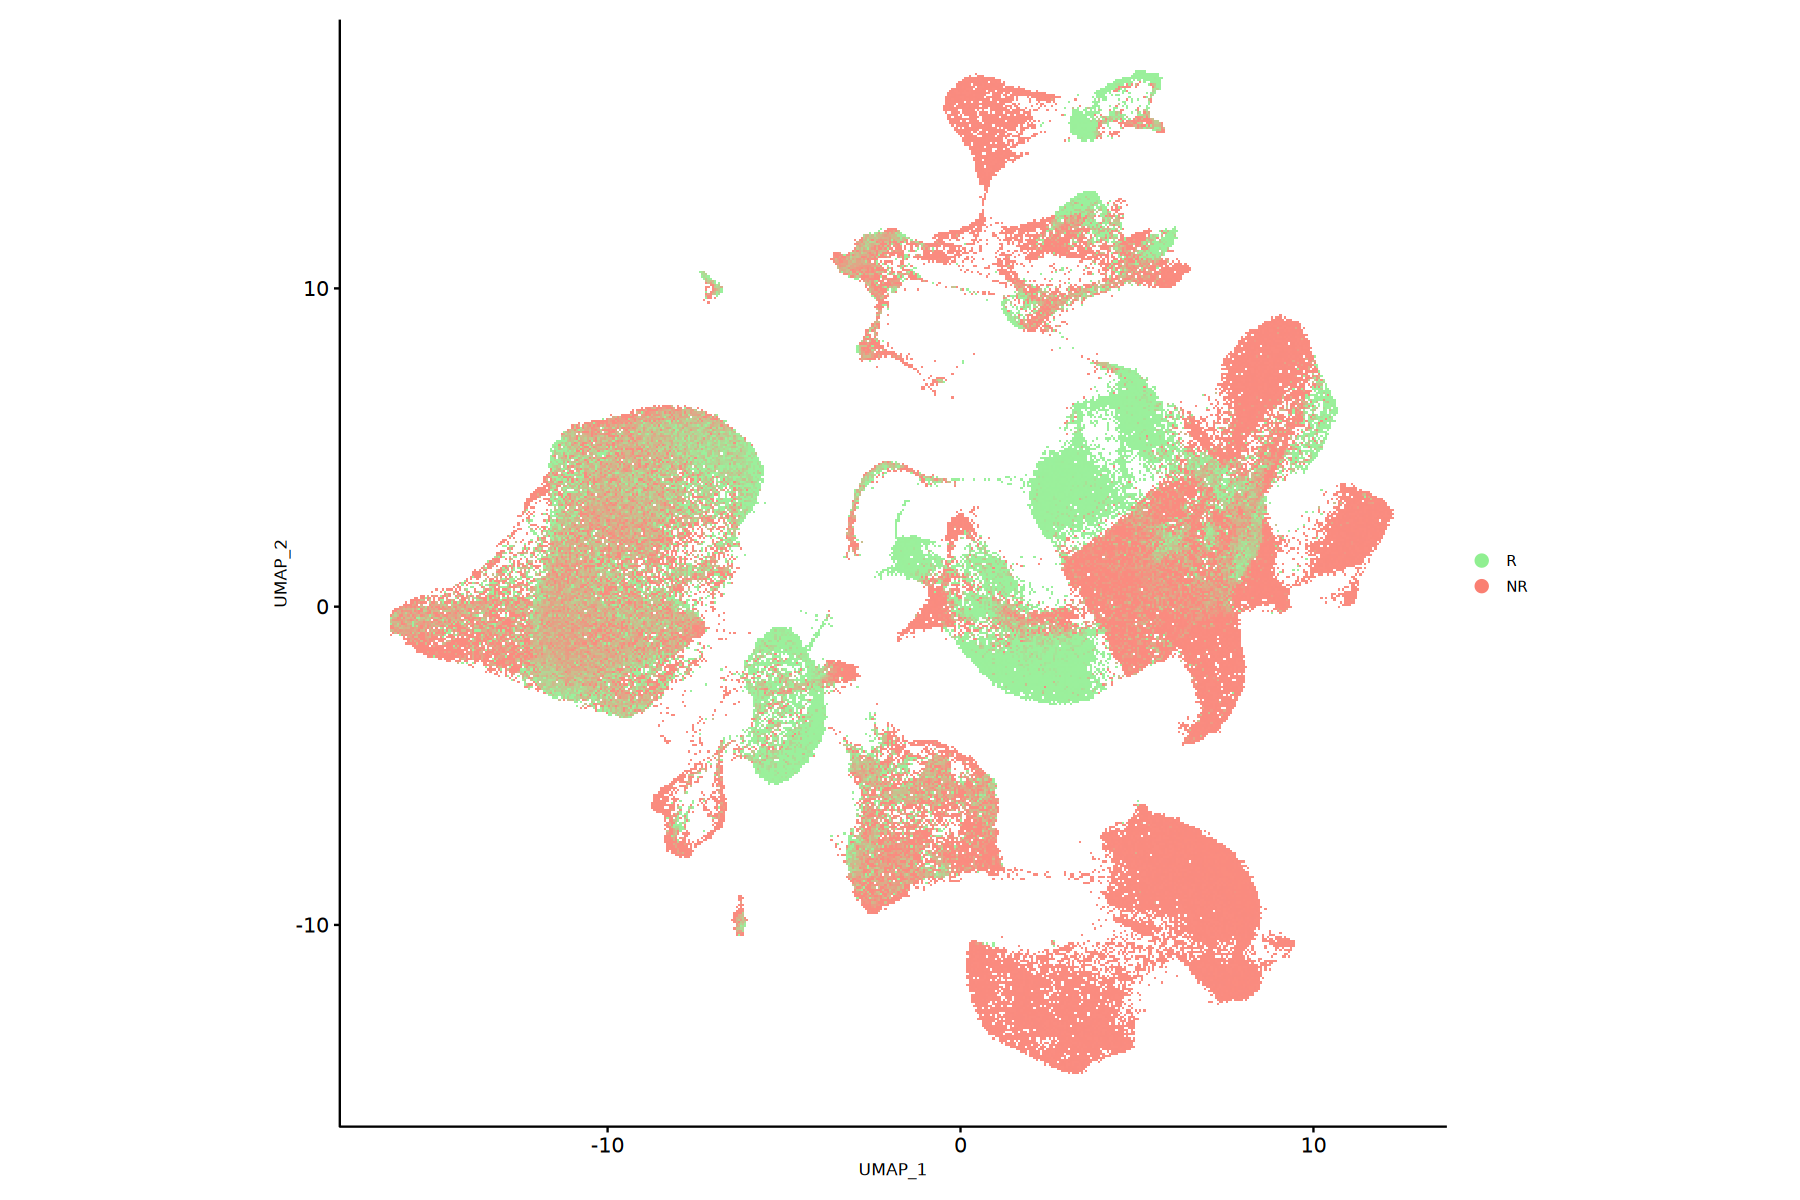

In [95]:
#EXTENDED FIGURE 1E
Idents(obj.RNA) <- 'response_short'
plot5 <- DimPlot(obj.RNA, cols = c(NR = "#FA7F72", R = "#90EF91"), pt.size = 0.9, repel = TRUE) + 
            theme(aspect.ratio = 1, text = element_text(size = 10))
plot5

# Extended Figure 2E - Cell subtype proportions

In [4]:
subtype_order <- c('Tumor - Cell Cycle - G1/S','Tumor - Cell Cycle - G2/M',
          'Tumor - Cell Cycle HMG-rich', 'Tumor - Chromatin', 'Tumor - EMT-III', 'Tumor - Hypoxia',
          'Tumor - Interferon/MHC-II (I)','Tumor - MYC','Tumor - Protein maturation',
          'Tumor - Respiration','Tumor - Secreted I','Tumor - Skin-pigmentation',
          'Tumor - Stress','Tumor - Stress (in vitro)','Tumor - Translation initiation',
          'Tumor - Unassigned','Tumor - Unfolded protein response', 'Tumor - NA',
        'CD8 Tn','CD8 early activated Teff','CD8 HNRNPH1+ Teff','CD8 GZMK+ Teff',
          'CD8 Tem','CD8 Texme','CD8 Tex/HS','CD8 GNLY+ Tex','CD8 FTL+ Tex',
          'CD8 NKT','CD4 Tn','CD4 CD69+ T','CD4 Tm','CD4 Tex','CD4 Treg',
          'CD4 NKT','Monocyte classical','Monocyte non-classical','Macrophage M1',
          'Macrophage M2','Macrophage tumor-associated','DN NKT','other T','Naive B',
          'Transitional B','Memory B','Plasma B','NK','Cycling T','cDC1',
          'cDC2','mDC','pDC','Mast','Endothelial', 'Inflammatory fibroblast',
          'Myofibroblast','Keratinocyte')


In [5]:
subtype.percentages <- c()

In [6]:
#make it easier to track 
obj.RNA$cell_subtype_percentage <- ''

In [9]:
total.num.cells <- length(colnames(obj.RNA))

In [11]:
for(c in subtype_order) {
    new.label <- paste0(c, ' (', round(((dim(obj.RNA@meta.data[obj.RNA$cell_subtype == c,])[1])/total.num.cells)*100, 2), '%)')
    obj.RNA@meta.data[obj.RNA$cell_subtype == c,]$cell_subtype_percentage <- new.label
    
    subtype.percentages <- append(subtype.percentages, new.label)
}

In [12]:
obj.RNA$cell_subtype_percentage <- factor(obj.RNA$cell_subtype_percentage, levels = subtype.percentages)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



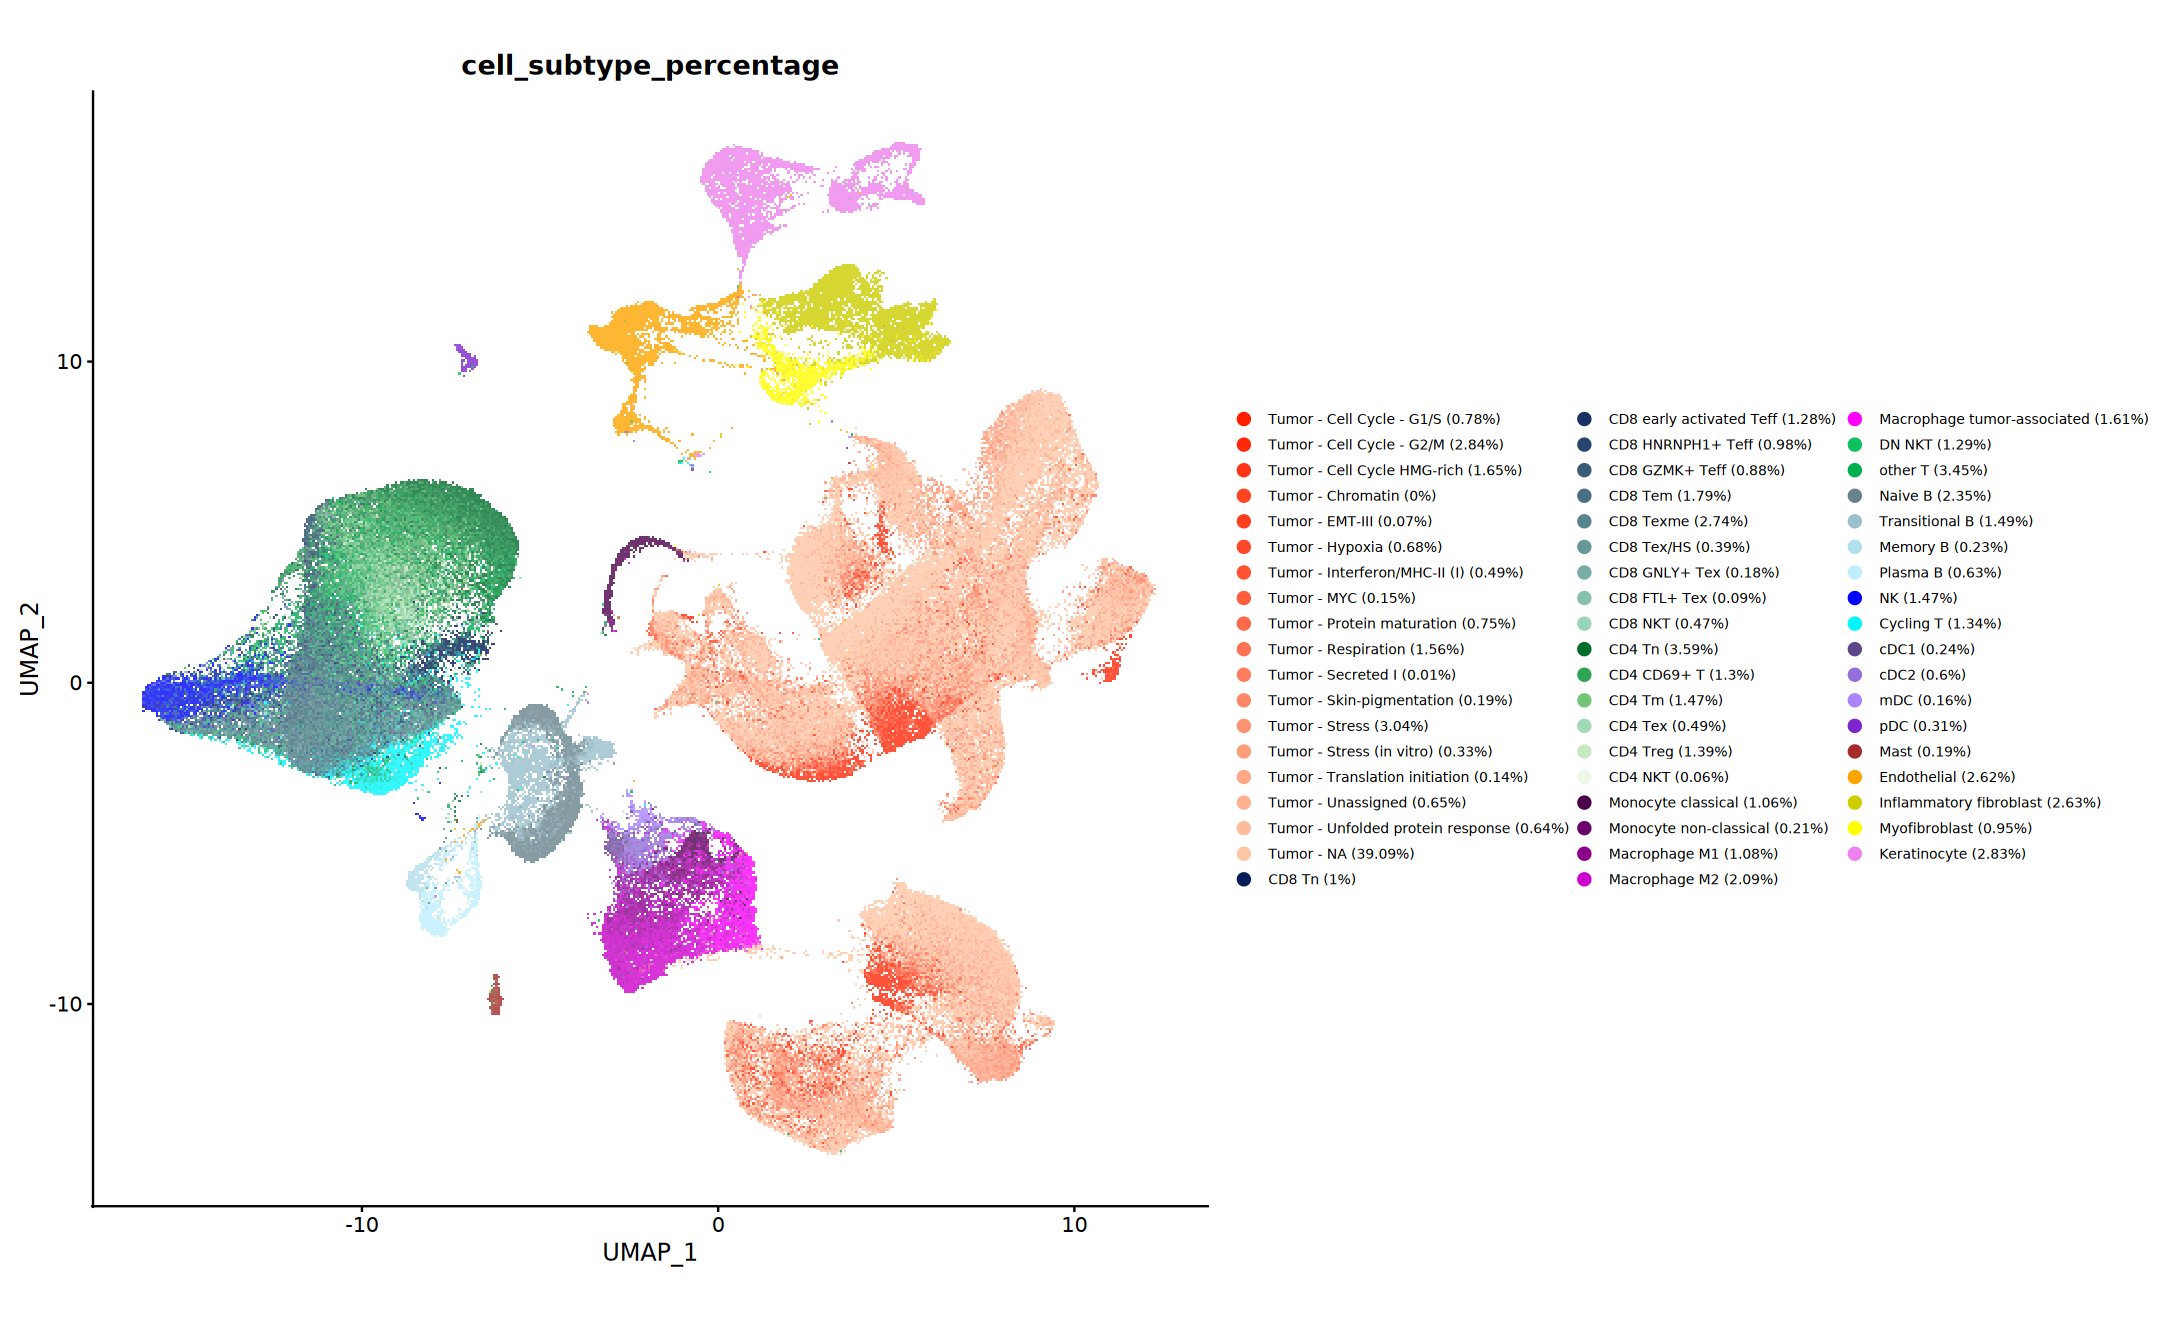

In [13]:
options(repr.plot.width = 18, repr.plot.height = 11)

plot1 <- DimPlot(obj.RNA, cols=c("Endothelial (2.62%)" = 'orange', "Keratinocyte (2.83%)" = 'violet', 
             "Myofibroblast (0.95%)" = 'yellow', "Inflammatory fibroblast (2.63%)" = 'yellow3', 
             "Mast (0.19%)" = 'brown', "pDC (0.31%)" = 'purple3',
             "mDC (0.16%)" = 'mediumpurple1', "cDC2 (0.6%)" = 'mediumpurple',
             "cDC1 (0.24%)" = 'mediumpurple4', "Cycling T (1.34%)" = '#00F7ff',
             "NK (1.47%)" = 'blue', "Plasma B (0.63%)" = 'lightblue1', 
             "Memory B (0.23%)" = 'lightblue2', "Transitional B (1.49%)" = 'lightblue3', 
             "Naive B (2.35%)" = 'lightblue4', "other T (3.45%)" = '#00B050', 
             "DN NKT (1.29%)" = '#0FC05F', "Macrophage tumor-associated (1.61%)" = 'magenta1',
             "Macrophage M2 (2.09%)" = 'magenta3', "Macrophage M1 (1.08%)" = 'magenta4',
             "Monocyte non-classical (0.21%)" = '#6B006B', "Monocyte classical (1.06%)" = '#4B004B',
             "CD4 NKT (0.06%)" = '#edf8e8', "CD4 Treg (1.39%)" = '#c7e8c0',
             "CD4 Tex (0.49%)" = '#a1d8b6', "CD4 Tm (1.47%)" = '#74c476',
             "CD4 CD69+ T (1.3%)" = '#31a354', "CD4 Tn (3.59%)" = '#006d2c',
             "CD8 NKT (0.47%)" = '#97D6B8', "CD8 FTL+ Tex (0.09%)" = '#87C1AD',
             "CD8 GNLY+ Tex (0.18%)" = '#77ADA3', "CD8 Tex/HS (0.39%)" = '#679898',
             "CD8 Texme (2.74%)" = '#57848D', "CD8 Tem (1.79%)" = '#486F83',
             "CD8 GZMK+ Teff (0.88%)" = '#385B78', "CD8 HNRNPH1+ Teff (0.98%)" = '#28466D',
             "CD8 early activated Teff (1.28%)" = '#183263', "CD8 Tn (1%)"  = '#081D58',
             "Tumor - NA (39.09%)" = "#FFC6A5", "Tumor - Unfolded protein response (0.64%)" = "#FFBC9B",
             "Tumor - Unassigned (0.65%)" = "#FFB190", "Tumor - Translation initiation (0.14%)" = "#FFA786",
             "Tumor - Stress (in vitro) (0.33%)" = "#FF9C7C", "Tumor - Stress (3.04%)" = "#FF9271",
             "Tumor - Skin-pigmentation (0.19%)" = "#FF8767", "Tumor - Secreted I (0.01%)" = "#FF7D5D",
             "Tumor - Respiration (1.56%)" = "#FF7253", "Tumor - Protein maturation (0.75%)" = "#FF6848",
             "Tumor - MYC (0.15%)" = "#FF5D3E", "Tumor - Interferon/MHC-II (I) (0.49%)" = "#FF5334",
             "Tumor - Hypoxia (0.68%)" = "#FF4829", "Tumor - EMT-III (0.07%)" = "#FF3E1F", "Tumor - Chromatin (0%)" = "#FF441F",
             "Tumor - Cell Cycle HMG-rich (1.65%)" = "#FF3315", "Tumor - Cell Cycle - G2/M (2.84%)" = "#FF290A",
             "Tumor - Cell Cycle - G1/S (0.78%)" = "#FF1E00"), group.by = "cell_subtype_percentage", 
                 shuffle = TRUE, raster=TRUE, pt.size = 0.8) + theme(aspect.ratio = 1) + theme(legend.text = element_text(size = 8))

plot1